In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams["axes.labelsize"] = 15
plt.rcParams["figure.figsize"] = (14,5)
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["image.origin"] = "lower"

# PDE

> (Capítulos 17 y 18 de Landau: A survey of computational physics)


Ecuación sobre $U(x,y)$. Notación: 

$$
\frac{d^2 U}{d x^2} \equiv \partial_x^2 U
$$

Ecuación de segundo orden general:

$$
\left(A \;\partial_x^2 + 2 B \;\partial_x \partial_y + C \;\partial_y^2 +D\; \partial_x + E\; \partial_y\right) U = F
$$

Las $A,B,C$ y $F$ pueden ser funciones $A = A(x,y)$.

El discriminante es el mismo que con una sección cónica: $AC-B^2$

Algunos ejemplos:

$$
\nabla^2 U(x,y) = 0 \qquad \text{(Laplace)}
$$

$$
\nabla^2 U(x,y) = -4\pi \rho(x,y) \qquad \text{(Poisson)}
$$

$$
x \partial_x^2 U + \partial_y^2 U = - 4\pi \rho
$$

$AC-B^2 = 1 > 0 $, entonces es Elíptica

$$
\nabla^2 U(\vec{x},t) = \alpha \partial_t U(\vec{x},t) \qquad \text{(Calor)}
$$

discriminante = 0, entonces es parabólica.

$$
\nabla^2 U(\vec{x},t) = \frac{1}{c^2} \partial_t^2 U(\vec{x},t) \qquad \text{(Onda)}
$$

discriminante $AC-B^2=-1/c^2 < 0$ entonces es Hiperbólica. 

## Tipos de condiciones iniciales

Dirichlet: Fijan el valor de $U(x,y)$ en la frontera del espacio de soluciones.

Newmann: Fijan el valor de alguna derivada $\partial_{\hat{r}} U(x,y)$ en la frontera.

Periódicas: $U(x+P,y) = U(x,y)$

Libres: ?

## Diferencias finitas

Notación: si estamos en una grilla donde $x_k= k \delta_x$, 
$$
U(x_k,y_j) = U_{k,j} \qquad \text{y} \qquad U(x_k+\delta_x,y_j) = U(x_{k+1},y_j) = U_{k+1,j} 
$$ 

### primera derivada 

central:
$$
\partial_x y(x) \approx \frac{y(x+\delta_x)-y(x-\delta_x)}{2\delta_x} = \frac{y_{k+1}-y_{k-1}}{2\delta_x} + \mathcal{O}(\delta_x)
$$

$$
\partial_x U(x,y) \approx \frac{U(x+\delta_x,y)-U(x-\delta_x,y)}{2\delta_x} = \frac{U_{k+1,j}-U_{k-1,j}}{2\delta_x} + \mathcal{O}(\delta_x)
$$

forward:
$$
\partial_x U(x,y) \approx \frac{U(x+\delta_x,y)-U(x,y)}{2\delta_x} = \frac{U_{k+1,j}-U_{k,j}}{\delta_x} + \mathcal{O}(\delta_x)
$$

también se puede hacer con más puntos:
$$
\partial_x U(x,y) \approx  \frac{-\frac32 U_{k,j} + 2 U_{k+1,j} - \frac12 U_{k+2,j}}{\delta_x} + \mathcal{O}(\delta_x{}^2)
$$

(los coeficientes generales están [aquí](https://en.wikipedia.org/wiki/Finite_difference_coefficient))

$$
\partial_x^2 y(x) = \frac{y(x+\delta) - 2 y(x) + y(x-\delta)}{\delta_x^2}
$$

In [85]:
np.diag(np.ones(5)*-2) + np.diag(np.ones(4),1) + np.diag(np.ones(4),-1)

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

### Segunda derivada

central:

$$
\partial_y^2 U(x,y) = \frac{U_{k,j+1}-2 U_{k,j} + U_{k,j-1}}{\delta_y{}^2}
$$

$$
\partial_x^2 U(x,y) = \frac{U_{k+1,j}-2 U_{k,j} + U_{k-1,j}}{\delta_x{}^2}
$$

Así que la ecuación de Laplace, por ejemplo

$$
\nabla^2 U(x,y) = 0 = \partial_y^2 U(x,y) + \partial_x^2 U(x,y)
$$

Se escribiría 

$$
\frac{U_{k,j+1}-2 U_{k,j} + U_{k,j-1}}{\delta_y{}^2} + \frac{U_{k+1,j}-2 U_{k,j} + U_{k-1,j}}{\delta_x{}^2} = 0
$$

Podemos despejar $U_{k,j}$. Simplificamos el caso $\delta_y=\delta_x=\delta$

$$
U_{k,j} = \frac14 \left(U_{k,j-1}+U_{k,j+1}+U_{k+1,j}+U_{k-1,j}\right)
$$

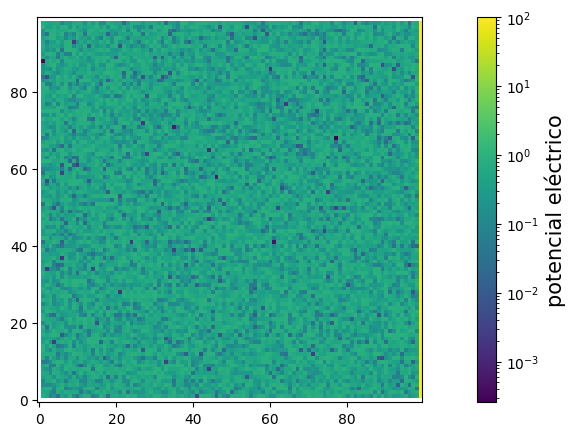

In [92]:
N = 100
x = np.linspace(0,5,N)
y = np.linspace(0,5,N)

U = np.random.rand(N,N)

# condiciones de frontera
U[:,-1] = 100.
U[:,0] = 0.
U[0,:] = 0.
U[-1,:] = 0.
p = plt.imshow(U,norm="log")            
plt.colorbar(label="potencial eléctrico")

In [90]:
from tqdm.notebook import tqdm
iters = 1000

for iter in tqdm(range(iters)):
    for j in range(1,N-2):
        for k in range(1,N-2):
            U[j,k] = (U[j+1,k]+U[j-1,k]+U[j,k-1]+U[j,k+1]) / 4
            U[:,-1] = 100.
            U[:,0] = 0.
            U[0,:] = 0.
            U[-1,:] = 0.

  0%|          | 0/1000 [00:00<?, ?it/s]

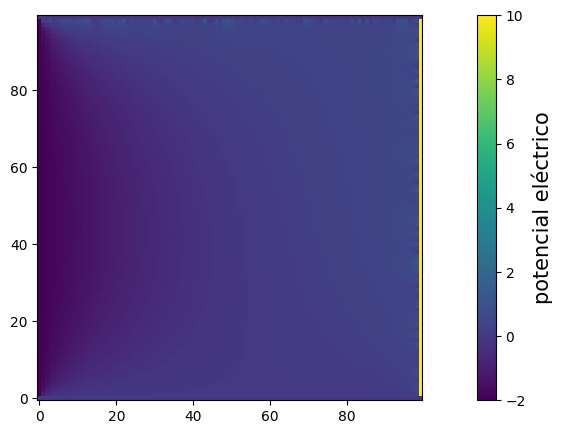

In [91]:
p = plt.imshow(U)            
plt.colorbar(label="potencial eléctrico")

Numba es un acelerador de código de python:

In [58]:
from numba import njit

In [111]:
@njit
def advance(U,iters):
    for i in range(iters):
        for j in range(1,N-1):
            for k in range(1,N-1):
                U[j,k] = (U[j+1,k]+U[j-1,k]+U[j,k-1]+U[j,k+1]) / 4
            # boundary conditions
            U[:,-1] = 100.
            U[:,0] = 0.
            U[0,:] = 10*x
            U[-1,:] = -20*x
advance(U,1)

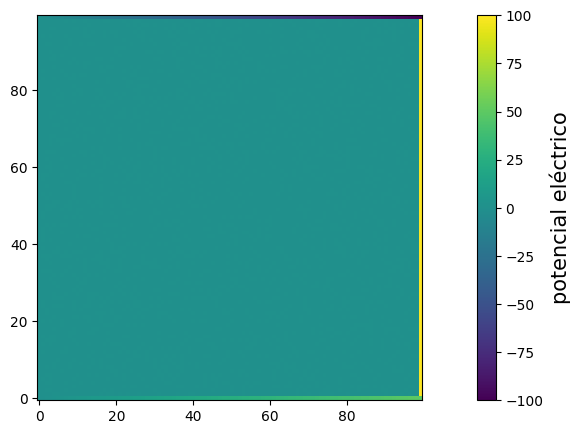

In [112]:
U = np.random.rand(N,N)

# condiciones de frontera
U[:,-1] = 100.
U[:,0] = 0.
U[0,:] = 10*x
U[-1,:] = -20*x
p = plt.imshow(U)            
plt.colorbar(label="potencial eléctrico")

In [113]:
advance(U,10_000)

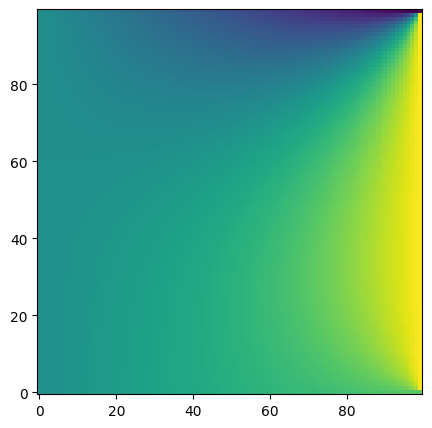

In [115]:
plt.imshow(U) 

# Ejemplo variable en el tiempo

La ecuación de calor en diferencias finitas. Usamos central difference para la parte espacial y forward para la parte temporal.

$$
\nabla^2 U(\vec{x},t) = \alpha \partial_t U(\vec{x},t)
\qquad \to \qquad 
\frac{U_{k,j+1,l}-2 U_{k,j,l} + U_{k,j-1,l}}{\delta{}^2} + \frac{U_{k+1,j,l}-2 U_{k,j,l} + U_{k-1,j,l}}{\delta{}^2} = \alpha \frac{U_{j,k,l+1}-U_{j,k,l}}{\delta_t }
$$

Esta vez queremos resolver para la solución en el tiempo $t+\delta_t$, es decir $U_{j,k,l+1}$.

$$
U_{j,k,l+1} = U_{j,k,l} + \frac{\delta_t}{\alpha \delta_x{}^2} \left( U_{j-1,k,l} + U_{j, k-1,l} - 4 U_{k, j} + U_{j,k+1,l} + U_{j+1,k,l} \right)
$$

Ejercicio: usar este método para avanzar la ecuación de calor hasta $t=10$, 
para el mismo sistema de antes, con temperatura inicial $U_{j,k,0}= 25$ en todos lados

In [121]:
N_xy = 50
N_t = 100
α = 7.


x = np.linspace(0,10,N_xy)
y = np.linspace(0,10,N_xy)
t = np.linspace(0,10,N_t)

U = np.zeros( (N_xy,N_xy,N_t) )
# inicial
U[:,:,0] = 25.
# frontera
U[:,-1,:] = 100.
U[:,0,:] = 0.
U[0,:,:] = 0.
U[-1,:,:] = 0.